# Titanic: Predicting Survival 

## Project Background 

The RMS Titanic is the most well-known ship in modern history. During its maiden voyage, the RMS Titanic fatally struck an iceberg that led to it's sinking. Tragically, around 2/3 of it's passengers and crew died. The distaster drew great public attention and inspired numerous generations of artistic work like James Cameron's Titanic. 

In this project, we will be analyzing the 'titanic' dataset from the seaborn package. This dataset contains a sample of 891 passengers from the ship and information about them and their voyage. Using the dataset, we will answer the following question: can we accurately predict if a passenger, based on a variety of objective variables, will survive the sinking of the Titanic? 

The project is organized into the 5 sections belows:
<ol>
<li>Importing Important Libraries, Packages, and Modules</li>
<li>Exploratory Data Analysis</li>
<li>Data Cleaning/Transformation</li>
<li>Modeling</li>
<li>Model Evaluation</li>

## 1. Importing Important Libraries, Packages, and Modules


In [1]:
import numpy as np # data manipulation
import pandas as pd # data manipulation
import seaborn as sns # visualization and includes 'titanic' dataset
import matplotlib.pyplot as plt # visualization

## 2. Exploratory Data Analysis
In this section, we will explore the dataset by getting summary statistics, calculating rates and ratios, and producing visualizations. 

In [2]:
# load 'titanic dataset'
titanic = sns.load_dataset('titanic')

# preview the data
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


As we can see above, the data features the following variables:
<ul>
<li>survived - survival (0 = No; 1 = Yes)</li> 
<li>pclass - passenger class (1 = 1st, 2 = 2nd, 3 = 3rd) </li>
<li>sex - male, female</li>
<li>age - persons age in years</li>
<li>sibsp - number of sibling/spouse aboard</li>
<li>parch - number of parents/children aboard</li>
<li>fare - fare</li>
<li>embarked - port of embarkation (C = Cherbourg, Q = Queenstown, S = Southhampton</li>
<li>class - passenger class</li>
<li>who - man, woman, child</li>
<li>adult_male - True, False</li>
<li>deck - deck of the ship</li>
<li>embark_town - port of embarkation</li>
<li>alive - yes, no</li>
<li>alone - if the passenger was alone or not (True, False)</li>
</ul>
We can already see that there are numerous redundant variables, like survived and alive, that we will remove later.

In [3]:
# get the number of rows and columns in the data
titanic.shape
# 891 rows and 15 columns of data
# each row represents a passenger

(891, 15)

In [4]:
# obtain some summary statistics on each numerical parameter
titanic.describe()
# noteably age has a cound less than 891, meaning there are many missing values

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# determine how many passengers survived
titanic['survived'].value_counts()
# 549 did not survive, 342 did

0    549
1    342
Name: survived, dtype: int64

<AxesSubplot:xlabel='survived', ylabel='count'>

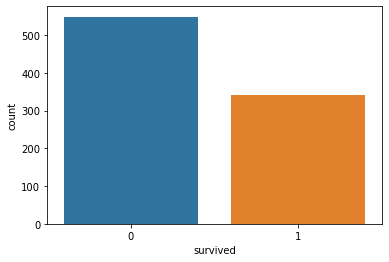

In [6]:
# visualize survival
sns.countplot(x=titanic['survived'])

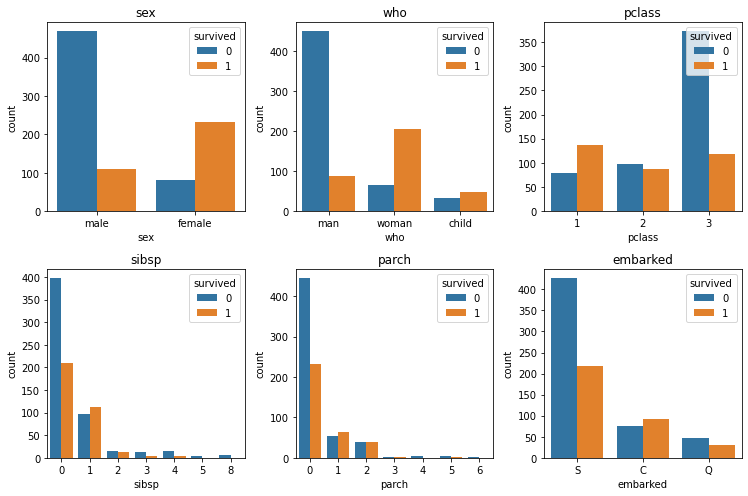

In [7]:
# visualize survival based on the variables: 'sex', 'who', 'pclass', 'sibsq', 'parch', 'embarked'
variables = ['sex', 'who', 'pclass', 'sibsp', 'parch', 'embarked']

# 2 x 3 gives us 6 subplots, one fore each variable
rows = 2 
columns = 3 
# get empty plots
figure, axis = plt.subplots(rows, columns, figsize=(columns*3.5,rows*3.5)) # get empty plots
# loop to fill up empty plots
for r in range(0, rows):
    for c in range(0,columns):
        i = r * columns + c # indexer
        axs = axis[r][c] # show where to position each subplot
        sns.countplot(x=titanic[variables[i]], hue=titanic['survived'],ax=axs)
        axs.set_title(variables[i]) # set title for each plot
        axs.legend(title='survived',loc='upper right')
plt.tight_layout() # minimal spacing between each subplot

From these charts we can make numerous observations. For instance, men were unlikely to survive the Titanic accident, women and/or females were the most likely to survive, and class played an important role in determining surivival. In addition, embarking at Charbourg increased one's chances of survival as well. Evidently, one's class and sex determined their likeliness to survive greatly (being a woman and in a higher class improved survival). However, to gain a better understanding, we should quantify this.

In [8]:
# survival rate by sex
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [9]:
# survival rate by class and sex
titanic.pivot_table('survived', index='sex',columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


<AxesSubplot:xlabel='class', ylabel='survived'>

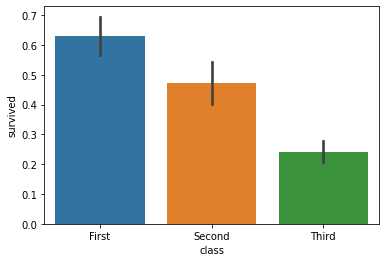

In [10]:
# visualize overall survival rate by class
sns.barplot(x='class', y='survived', data=titanic)

In [11]:
# look at survival by sex, age, and class
age = pd.cut(titanic['age'], [0,18,80]) # divide age into adults and non adults
titanic.pivot_table('survived',['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

We continue to see the same pattern. The lower class someone is, the more likely they are not going to survive. Furthermore, being male and an adult is a severe disadvantage. In addition, being older reduced one's change of survival too. Note that the second class females 18 and under have a perfect survival rate. This is a result of there being a very small sample of inviduals who fit this category.

## 3. Data Cleaning/Transformation
Now that we have made several observations about the dataset, we can begin cleaing and transforming it for predictive modeling. First we will begin by handling missing values. 

In [12]:
# obtain number of missing values in each column
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [13]:
# determine which columns are redundant
for index in titanic:
    print(titanic[index].value_counts())
    print()

0    549
1    342
Name: survived, dtype: int64

3    491
1    216
2    184
Name: pclass, dtype: int64

male      577
female    314
Name: sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: age, Length: 88, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: fare, Length: 248, dtype: int64

S    644
C    168
Q     77
Name: embarked, dtype: int64

Third     491
First     216
Second    184
Name: class, dtype: int64

man      537
woman    271
child     83
Name: who, dtype: int64

True     537
False    354
Name: adult_male, dtype: int64

C    59
B    47
D    33
E    32
A    15
F    13
G     

In the two cells above we can make several observations. First, the variable deck is missing 688 values, which means that the majority of the sample lacks this data. As a result, we will remove this column from our analysis for it is too incomplete. In addition, the redundancy of several columns is evident as well in that they share the same counts of specific values. These pairs or groups of columns include survived/alive, embarked/embark_town, pclass/class, sibsp/alone, and sex/who/adult_male. As result we will be dropping several columns and rows.

In [14]:
# drop redundant columns
titanic = titanic.drop(['class','who','adult_male','deck','embark_town','alive','alone'], axis=1)
# observe change in shape
# 7 less columns
titanic.shape

(891, 8)

In [18]:
# drop incomplete data
titanic = titanic.dropna(subset=['embarked','age'])
# observe change in shape 
# 179 less rows
titanic.shape

(712, 8)

Now that we have gotten rid of missing values, we need to make sure that all the value are numerical so that we can use the data for our statistical models. If any values are non-numerical, we have to convert them to numerical types.

In [19]:
# get data type of each variable
titanic.dtypes
# 'sex' and 'embarked' are both object dtypes, this will need to be changed

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [20]:
# observe the unique values in 'sex' and 'embarked' 
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [33]:
# convert values in 'sex' and 'embarked' to numerical types
titanic['sex'].replace(['female','male'], [0,1], inplace=True)
titanic['embarked'].replace(['S','C','Q'], [0,1,2], inplace=True)

# display results
print(titanic.head(10))
print(titanic.dtypes)

    survived  pclass  sex   age  sibsp  parch     fare  embarked
0          0       3    1  22.0      1      0   7.2500         0
1          1       1    0  38.0      1      0  71.2833         1
2          1       3    0  26.0      0      0   7.9250         0
3          1       1    0  35.0      1      0  53.1000         0
4          0       3    1  35.0      0      0   8.0500         0
6          0       1    1  54.0      0      0  51.8625         0
7          0       3    1   2.0      3      1  21.0750         0
8          1       3    0  27.0      0      2  11.1333         0
9          1       2    0  14.0      1      0  30.0708         1
10         1       3    0   4.0      1      1  16.7000         0
survived      int64
pclass        int64
sex           int64
age         float64
sibsp         int64
parch         int64
fare        float64
embarked      int64
dtype: object


## 4. Modeling
With our data cleaned and transformed, we can begin the modeling. First, we will split the data into X-independent and Y-dependent variables. Second, we will split the X and Y into training and test datas. Finally, we will run multiple machine learning models on the data. As mentioned previously, the models will aim to predict survival (Y-dependent variable) using the the other variables (X-independent variables). Here the training data is used to train the machine learning models to predict survival. The accuracy of the machine learning models are validated/verified by applying them to the testing data.

In [34]:
# split data into independent X and dependent Y Variables
X = titanic.iloc[:, 1:8].values 
Y = titanic.iloc[:,0].values

In [35]:
# split X and Y into training and testing data
from sklearn.model_selection import train_test_split 

# split is 80% training and 20% testing 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [72]:
# a function that runs multiple ML models on our training data 
def models(X_train,Y_train):
    # logistic regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train, Y_train)
    
    # k-nearest neighbors 
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
    knn.fit(X_train, Y_train)
    
    # Support Vector Machine (SVC) with linear kernel
    from sklearn.svm import SVC
    svc_lin = SVC(kernel='linear', random_state=0)
    svc_lin.fit(X_train, Y_train)
    
    # SVC (RBF Kernel)
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel='rbf', random_state=0)
    svc_rbf.fit(X_train, Y_train)
    
    # Gaussian Naive Bayes 
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, Y_train)
    
    # Decision Tree 
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=0)
    tree.fit(X_train, Y_train)
    
    # RandomForest Classifier 
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=7, criterion='entropy', random_state=0)
    forest.fit(X_train, Y_train)
    
    # Print the the training accuracy for each model
    print('[0]Logistic Regression Training Accuracy:      ', log.score(X_train, Y_train))
    print('[1]K-Neigbors Training Accuracy:               ', knn.score(X_train, Y_train))
    print('[2]SVC Linear Training Accuracy:               ', svc_lin.score(X_train, Y_train))
    print('[3]SVC RBF Training Accuracy:                  ', svc_rbf.score(X_train, Y_train))
    print('[4]Gaussian NB Regression Training Accuracy:   ', gauss.score(X_train, Y_train))
    print('[5]Decision Tree Classifier Training Accuracy: ', tree.score(X_train, Y_train))
    print('[6]Random Forest Classifier Training Accuracy: ', forest.score(X_train, Y_train))
    
    return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [74]:
# apply models to training data
model = models(X_train, Y_train)

[0]Logistic Regression Training Accuracy:       0.804920913884007
[1]K-Neigbors Training Accuracy:                0.7803163444639719
[2]SVC Linear Training Accuracy:                0.7768014059753954
[3]SVC RBF Training Accuracy:                   0.6836555360281195
[4]Gaussian NB Regression Training Accuracy:    0.7943760984182777
[5]Decision Tree Classifier Training Accuracy:  0.8945518453427065
[6]Random Forest Classifier Training Accuracy:  0.9753954305799648


As we can see above, the model the produced the greatest accuracy was the Decision Tree Classifier with an accuracy of around 97.54%. Second is the Random Forest Classifier with around 89.46% and third is Logistic Regression with 80.49%. What this tells us is that a Decision Tree Regression model (applied to the training data) can most accurately predict survival (Y-dependent variable) based on the X-independent variables. Now we need to validate these results using the testing data.

## 5. Model Evaluation
The models' accuracies will be evaluated as follows. We will take the testing data's X-independent variables and use each model to predict the Y-dependent variable survival. We then will compare the predicted Y with the actual Y that is in the testing data. Accuracy is determined by comparing the number of true positives, true negatives, false positives, and false negatives. 

In [78]:
# confusion matrix and accuracy for all models on the test data
from sklearn.metrics import confusion_matrix

for i in range(len(model)):
    cm = confusion_matrix(Y_test, model[i].predict(X_test))
    
    # get True Negative, False Positive, False Negative, and True Positive
    TN, FP, FN, TP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel() 
    
    # accuracy score
    test_score = (TP + TN) / (TP + TN + FN + FP)
    
    # print results
    print('True Positive:',cm[0][0],'False Positive:',cm[0][1],
          '\nFalse Negative:',cm[1][0],'True Negative:',cm[1][1])
    print('Model[{}] Testing Accuracy= "{}"'.format(i, test_score))
    print()

True Positive: 73 False Positive: 9 
False Negative: 18 True Negative: 43
Model[0] Testing Accuracy= "0.8111888111888111"

True Positive: 64 False Positive: 18 
False Negative: 30 True Negative: 31
Model[1] Testing Accuracy= "0.6643356643356644"

True Positive: 70 False Positive: 12 
False Negative: 18 True Negative: 43
Model[2] Testing Accuracy= "0.7902097902097902"

True Positive: 75 False Positive: 7 
False Negative: 45 True Negative: 16
Model[3] Testing Accuracy= "0.6363636363636364"

True Positive: 67 False Positive: 15 
False Negative: 19 True Negative: 42
Model[4] Testing Accuracy= "0.7622377622377622"

True Positive: 73 False Positive: 9 
False Negative: 15 True Negative: 46
Model[5] Testing Accuracy= "0.8321678321678322"

True Positive: 62 False Positive: 20 
False Negative: 14 True Negative: 47
Model[6] Testing Accuracy= "0.7622377622377622"



As we can see, the model that predicted closest to the actual results of in testing data was the Decision Tree Classifier with an accuracy of around 83.22%. However, 83.22% is less than the 89.45% achieved with the training data. In addition the best model in the training data with an accuracy of 97.54%, Random Forest Classifier, achieved only an accuracy of 76.22%. These discrepancies in the results is likely are result of overfitting the training data. Tree models tend to easily overfit data due to them being sensitive to variation in the data to the point where they can miss general trends. Regardless, the Decision Tree Classifier performed best. However, the most consistent model was that of the logistic regression who's training accuracy was 80.49% and testing accuracy was 81.11%. Overall, the most accurate model for predicitng whether someone survives the titanic tragedy is the Decision Tree Classifier. With this in mind, lets take a look at which variables or features were most important in predicting survival using the Decision Tree Classifier model. 

In [81]:
# get feature importance 
decision_tree = model[5]
importances = pd.DataFrame({'feature':titanic.iloc[:, 1:8].columns, 
                            'importance': np.round(decision_tree.feature_importances_, 3)}) 
importances = importances.sort_values('importance', ascending=False).set_index('feature')
importances

,importance
feature,
sex,0.313
age,0.203
pclass,0.197
fare,0.162
sibsp,0.068
embarked,0.043
parch,0.014


<AxesSubplot:xlabel='feature'>

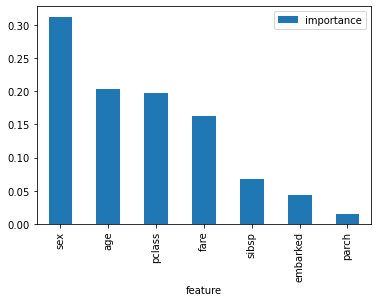

In [82]:
# visualize feature importance
importances.plot.bar()

Much like our initial observations during exploratory data analysis, sex, age, and pclass (person's class on ship) were the most important determinants of one's survival. Overall, the Decision Tree Classifier model does a good job of predicting survival without overfitting the training data significantly.